http://colah.github.io/posts/2015-08-Understanding-LSTMs/

http://blog.echen.me/2017/05/30/exploring-lstms/

In [1]:
### necessary functions from the keras library
from keras.models import Sequential
from keras.layers import Dense, Activation, LSTM, Dropout, SimpleRNN, GRU, TimeDistributed
from keras.optimizers import RMSprop
from keras.utils.data_utils import get_file
from keras.callbacks import ModelCheckpoint 
import keras
import random

Using TensorFlow backend.


In [22]:
out = 3
inp = 3
model = Sequential()
# First layer
model.add(SimpleRNN(out, input_shape =  (100,inp)))
# Second layer
model.add(Dense(2, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_8 (SimpleRNN)     (None, 3)                 21        
_________________________________________________________________
dense_20 (Dense)             (None, 2)                 8         
Total params: 29
Trainable params: 29
Non-trainable params: 0
_________________________________________________________________


In [31]:
out*inp + out**2 + out

3

In [34]:
out = 3
inp = 3
model = Sequential()
# First layer
model.add(SimpleRNN(out, input_shape =  (100,inp), return_sequences=True))
# Second layer
model.add(TimeDistributed(Dense(2, activation='softmax')))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_19 (SimpleRNN)    (None, 100, 3)            21        
_________________________________________________________________
time_distributed_9 (TimeDist (None, 100, 2)            8         
Total params: 29
Trainable params: 29
Non-trainable params: 0
_________________________________________________________________


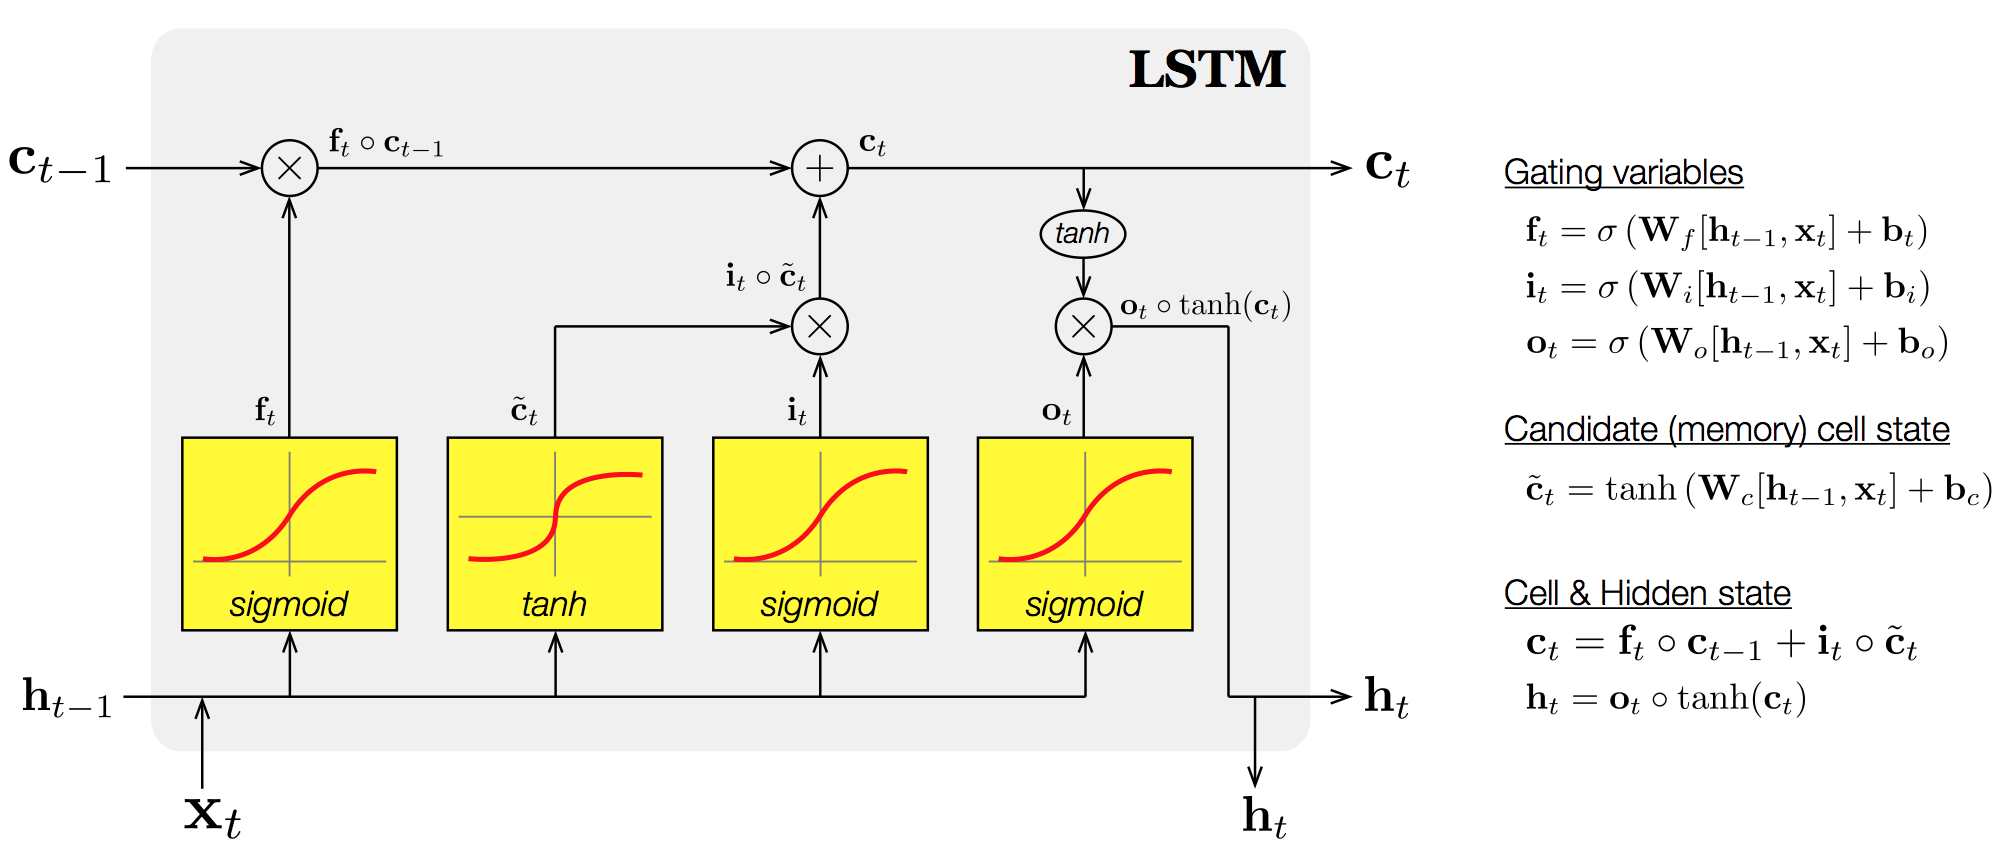

In [68]:
out = 1
inp = 1
model = Sequential()
# First layer
model.add(LSTM(out, input_shape =  (100,inp)))
# Second layer
model.add(Dense(10, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_33 (LSTM)               (None, 1)                 12        
_________________________________________________________________
dense_37 (Dense)             (None, 10)                20        
Total params: 32
Trainable params: 32
Non-trainable params: 0
_________________________________________________________________


In [69]:
(out*inp + out**2 + out)*4

12

In [66]:
out = 3
inp = 3
model = Sequential()
# First layer
model.add(GRU(out, input_shape =  (100,inp)))
# Second layer
model.add(Dense(10, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_1 (GRU)                  (None, 3)                 63        
_________________________________________________________________
dense_36 (Dense)             (None, 10)                40        
Total params: 103
Trainable params: 103
Non-trainable params: 0
_________________________________________________________________


In [67]:
(out*inp + out**2 + out)*3

63

In [47]:
import numpy as np
def sample_from_probabilities(probabilities, topn=None):
    print(len(probabilities))
    topn = len(probabilities)
    """Roll the dice to produce a random integer in the [0..ALPHASIZE] range,
    according to the provided probabilities. If topn is specified, only the
    topn highest probabilities are taken into account.
    :param probabilities: a list of size ALPHASIZE with individual probabilities
    :param topn: the number of highest probabilities to consider. Defaults to all of them.
    :return: a random integer
    """
    p = np.squeeze(probabilities)
    p[np.argsort(p)[:-topn]] = 0
    p = p / np.sum(p)
    return np.random.choice(topn, 1, p=p)[0]

def sample(a, temperature=1.0):
    # helper function to sample an index from a probability array
    a = np.array(a)**(1/temperature)
    p_sum = a.sum()
    sample_temp = a/p_sum 
    return np.argmax(np.random.multinomial(1, sample_temp, 1))

In [45]:
a = [0.15, 0.34, 0.36, 0.15]

In [50]:
%time sample(a, 0.1)

[  1.00783237e-04   3.60798634e-01   6.38999800e-01   1.00783237e-04]
CPU times: user 845 µs, sys: 911 µs, total: 1.76 ms
Wall time: 1.06 ms


2

In [51]:
% time sample2(a, 0.1)

[  1.00783237e-04   3.60798634e-01   6.38999800e-01   1.00783237e-04]
CPU times: user 533 µs, sys: 127 µs, total: 660 µs
Wall time: 596 µs


2